In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Temperature,Humidity,Water Level,Status
0,28.1,79,1.5,1
1,28.1,79,1.5,1
2,28.1,79,1.5,1
3,28.1,79,1.5,1
4,28.0,79,1.5,1


In [3]:
df.columns, df.shape
df['Status'].value_counts()

2    1915
1    1758
3     736
Name: Status, dtype: int64

In [4]:
X = df.drop(['Status'], axis = 1)
X.head()

,Temperature,Humidity,Water Level
0,28.1,79,1.5
1,28.1,79,1.5
2,28.1,79,1.5
3,28.1,79,1.5
4,28.0,79,1.5


In [5]:
y = df['Status']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [6]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:1]

array([[ 0.27851107, -1.03157759, -1.60232587]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3527, 3) (3527,)
Test set: (882, 3) (882,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Minimum error:- 0.0022675736961451248 at K = 0


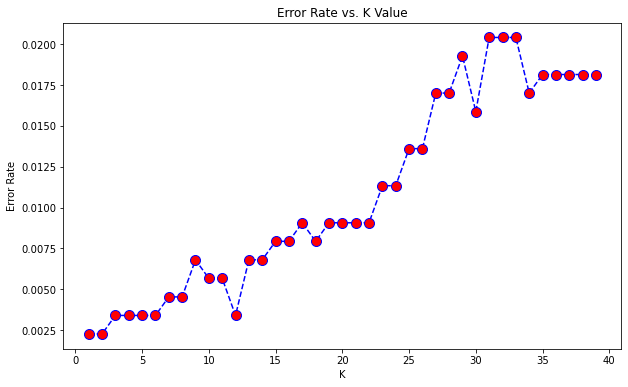

In [9]:
Ks = 40
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9977324263038548 at K = 0


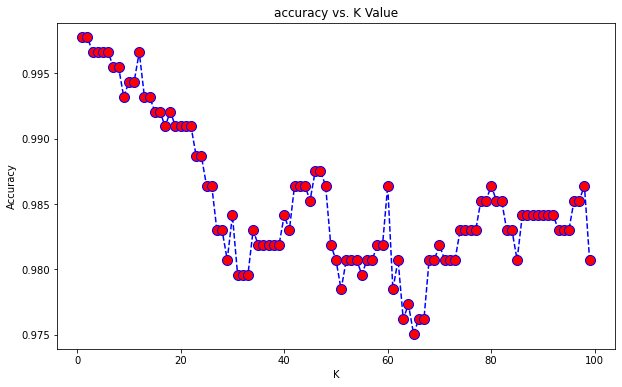

In [10]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [11]:
k = 2
#Train Model 
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
Pred_y = model.predict(X_test)
print("Accuracy of model at K=2 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=2 is 0.9977324263038548


In [13]:
Pred_y

array([1, 1, 2, 1, 3, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 2, 1, 2, 3, 2, 1, 2,
       1, 1, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 2, 2, 1, 3, 2, 1,
       2, 3, 2, 1, 2, 3, 2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2,
       3, 1, 1, 1, 2, 1, 1, 3, 3, 1, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1,
       3, 2, 1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       3, 2, 2, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 2, 1, 1, 2,
       1, 1, 1, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 1,

In [14]:
from sklearn.externals import joblib
joblib.dump(model, 'model.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Supipi\anaconda3\lib\site-packages\sklearn\externals\__init__.py)